In [36]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2019-04-07 16:53:04--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2019-04-07 16:53:04--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2532519e3a6bd12883244df692.dl.dropboxusercontent.com/zip_by_token_key?key=Aekll6OHQH16GF_q5CdwEWtC9TYwjbndyIoEb0e_LgK4YiHc-mS7wBl0eXSkv4vH0Bri6T5IZsjPVrpvdfdJ2UFTSBmKlYiKp97jKz3OPv1tm9tS-diun-HaaHHPiKutALqAszDifLWT-AY9o0XRti4FxOvB7tBkmhf5X6sAxUvM5rF1fib4rnM3tqqiBlJUvauMCpk6zh3xzNNdP2WYMjP0lyJWkPNgMCfaJr6LqpNzFL98_SppANY8TSzcK90TYk4 [following]
--2019-04-07 16:53:04--  https://

In [37]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0.1

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0.1
mapname:  conversion of  failed
replace images/horses/horse-146.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/horses/horse-146.jpg  
  inflating: images/humans/rider-74.jpg  
  inflating: images/dogs/dog.120.jpg  
  inflating: images/dogs/dog.82.jpg  
  inflating: images/cats/cat.75.jpg  
  inflating: images/horses/horse-45.jpg  
  inflating: images/humans/rider-68.jpg  
  inflating: images/humans/rider-185.jpg  
  inflating: images/horses/horse-27.jpg  
  inflating: images/horses/horse-36.jpg  
  inflating: images/cats/cat.45.jpg  
  inflating: images/humans/rider-192.jpg  
  inflating: images/humans/rider-81.jpg  
  inflating: images/dogs/dog.115.jpg  
  inflating: images/humans/rider-154.jpg  
  inflating: images/horses/horse-158.jpg  
  inflating: images/humans/rider-95.jpg  
  inflating: images/humans/rider-98.jpg  
  inflating: images/horses/horse-127.jpg  
  inflating: images/cats/cat.200.jpg  
  inflating: images/hor

In [38]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'     images   sample_data
'AABXTlPlU-1f4L_VdS4wY06ca?dl=0.1'   Images   val_images


In [0]:
import os, shutil
folders = os.listdir("images")

In [30]:
if not os.path.isdir('val_images'):
  os.mkdir('val_images')

classes = ['dogs', 'cats', 'horses', 'humans']
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   images   Images   sample_data   val_images


In [31]:
for c in classes:
  p = os.path.join('val_images', c)
  if not p:
    os.mkdir(p)
    
SPLIT = 0.9
for f in os.listdir('images'):
  path = 'images/'+f
  imgs = os.listdir(path)
  
  split_size = int(SPLIT*len(imgs))
  files_to_move = imgs[split_size:]
  print(len(files_to_move))
  
  for img_f in files_to_move:
    src = os.path.join(path, img_f)
    dest = os.path.join('val_images/'+f, img_f)
    shutil.move(src,dest)
    print(src)
    print(dest)

21


FileNotFoundError: ignored

In [32]:
for f in folders:
  path = 'images/'+f
  print(f+' '+str(len(os.listdir(path))))

horses 202
humans 202
cats 202
dogs 202


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [0]:
sample_path = 'images/cats/cat.1.jpg'
img = image.load_img(sample_path)

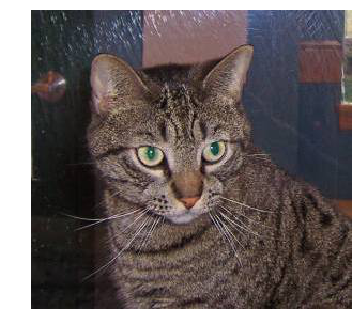

In [12]:
x = image.img_to_array(img)/255.0
plt.imshow(x)
plt.axis('off')
plt.show()

In [0]:
from keras.layers import *
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

adam = optimizers.adam(lr=1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory('images/', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 808 images belonging to 4 classes.


In [22]:
x,y = train_generator.next()
print(x.shape, y.shape)

(32, 150, 150, 3) (32, 4)


In [24]:
# Train our model

hist = model.fit_generator(train_generator, epochs=40, steps_per_epoch=7)

Epoch 1/40
7/7 [==============================] - 1s 116ms/step - loss: 1.0159 - acc: 0.5491
Epoch 2/40
7/7 [==============================] - 1s 76ms/step - loss: 1.0399 - acc: 0.5570
Epoch 3/40
7/7 [==============================] - 1s 89ms/step - loss: 0.9167 - acc: 0.6384
Epoch 4/40
7/7 [==============================] - 1s 105ms/step - loss: 0.9670 - acc: 0.5848
Epoch 5/40
7/7 [==============================] - 1s 99ms/step - loss: 0.9388 - acc: 0.6473
Epoch 6/40
7/7 [==============================] - 1s 95ms/step - loss: 0.9590 - acc: 0.6231
Epoch 7/40
7/7 [==============================] - 1s 122ms/step - loss: 0.8862 - acc: 0.6518
Epoch 8/40
7/7 [==============================] - 1s 99ms/step - loss: 0.9631 - acc: 0.6429
Epoch 9/40
7/7 [==============================] - 1s 100ms/step - loss: 0.8745 - acc: 0.6652
Epoch 10/40
7/7 [==============================] - 1s 99ms/step - loss: 0.8568 - acc: 0.6594
Epoch 11/40
7/7 [==============================] - 1s 110ms/step - loss: 0.